In [1]:
# Analise para a determinação dos picos nos espectros de referencia (espectrometros da 
#sala escura dos labs)
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.signal as sig
import pandas as pd

# retirar estas duas linhas se não tiver o jupyterthemes instalado
from jupyterthemes import jtplot
jtplot.style(context="paper", ticks=True, grid=True)

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 22})

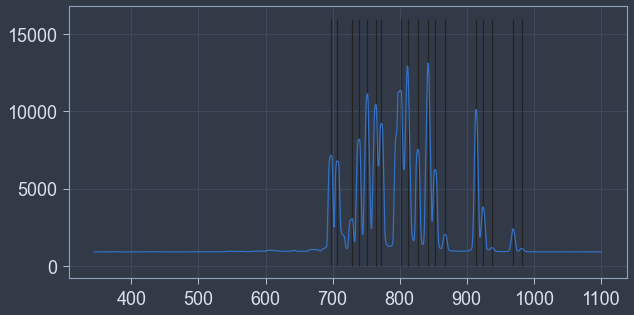

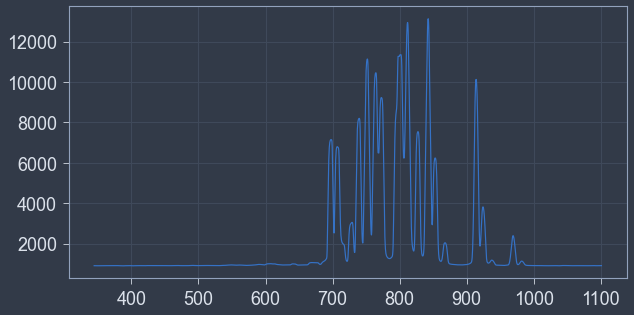

In [2]:
M = 2047

AFIX= "scansci0526_"
SOFIX= ".sample"
NameList= ("1hg", "1hg_red", "2he", "2he_red", "3ne", "4kr", "5ar", "5ar_red")

wavelenght = np.empty(M)
intensidade = np.empty(M)

for NAME in NameList:
    tmp = pd.read_csv(AFIX+ NAME+ SOFIX, header=None, delim_whitespace=True,skiprows=16)
    wavelenght = tmp.loc[:,[1]]
    wavelenght = np.array((wavelenght))
    intensidade = tmp.loc[:,[2]]
    intensidade = np.array((intensidade))
    intensidade = intensidade.reshape(2048)

    maximumMercurioVISNIR = sig.find_peaks(intensidade, prominence = 140)

    WV= np.transpose(wavelenght[maximumMercurioVISNIR[0]])[0]
    IN= intensidade[maximumMercurioVISNIR[0]]*1000/1.6383E4

    np.savetxt(NAME+ ".txt",  np.array( (WV,IN) ) , delimiter=";" )


plt.figure(figsize=(10,5))
for i in maximumMercurioVISNIR[0]:
    plt.vlines(wavelenght[i],0,16000,'k')

plt.plot(wavelenght,intensidade)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(wavelenght,intensidade)
plt.show()

In [3]:
# Como dar load aos dados: [0] é comprimento de onda [1] é intensidade
# X= np.loadtxt("FILENAME", delimiter=";")
# print(X[0])

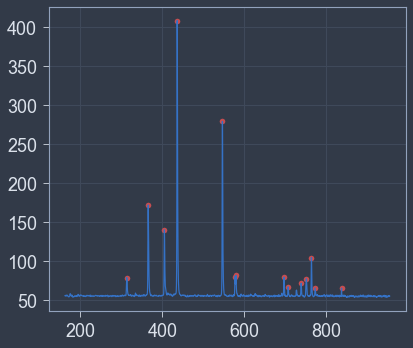

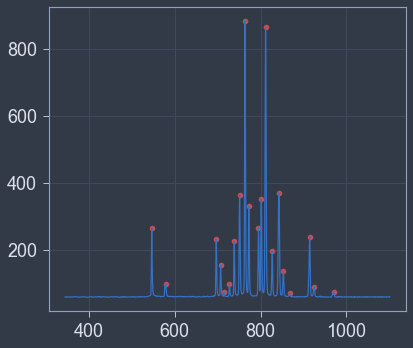

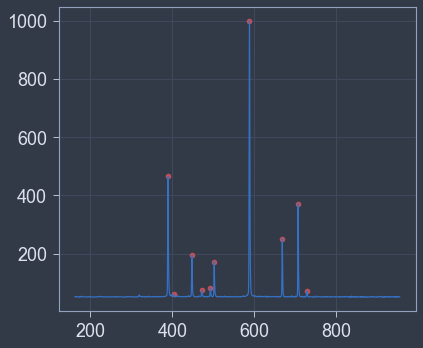

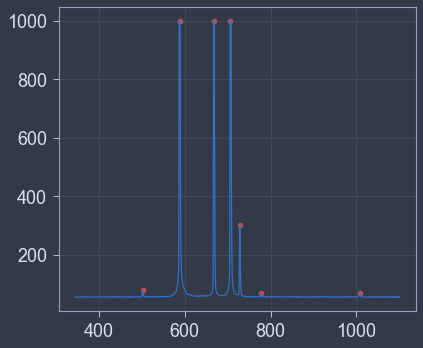

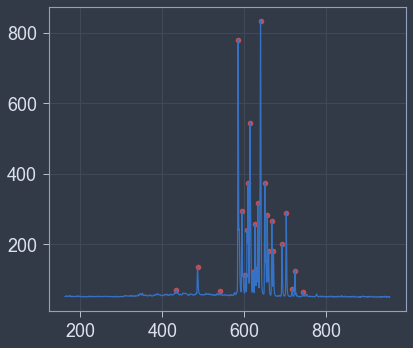

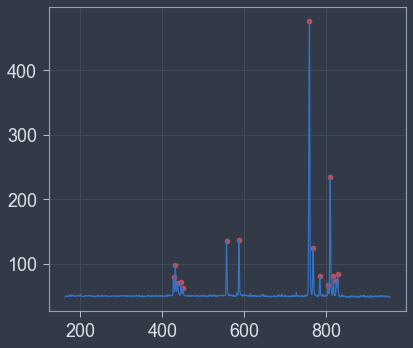

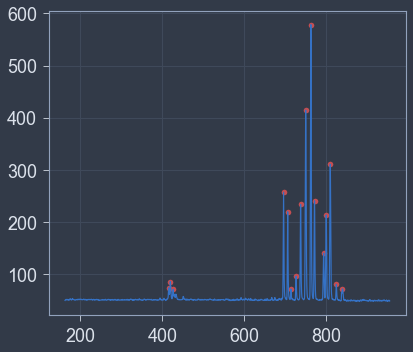

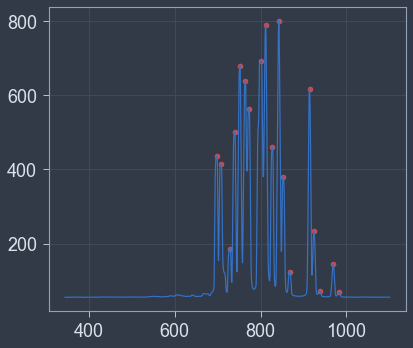

In [4]:
# confirmar os picos
for NAME in NameList:
    plt.figure()
    
    tmp = pd.read_csv(AFIX+ NAME+ SOFIX, header=None, delim_whitespace=True,skiprows=16)
    wavelenght = tmp.loc[:,[1]]
    wavelenght = np.array((wavelenght))
    intensidade = tmp.loc[:,[2]]
    intensidade = np.array((intensidade))
    intensidade = intensidade.reshape(2048)
    
    X= np.loadtxt(NAME+ ".txt", delimiter=";")
    plt.plot(X[0], X[1], "ro")
    
    plt.plot(wavelenght,intensidade*1000/1.6383E4)
    plt.show()

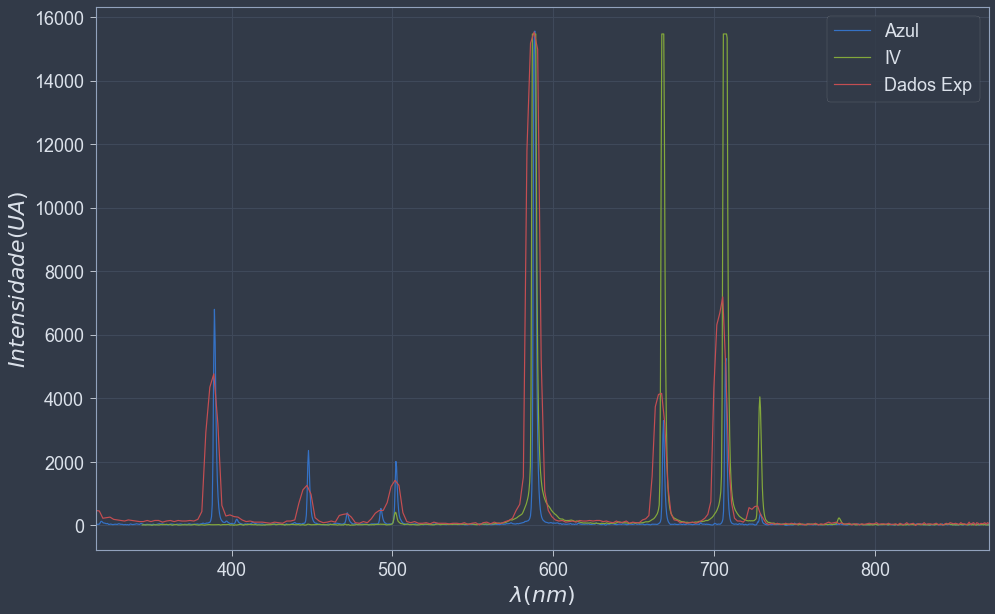

In [41]:
# Ignorar
PATH="C:\\Users\\jonny\\Uni\\2S\\LAC\\Projeto\\DadosExperimentais\\PraiseThe"
Hg= np.loadtxt( PATH+"TrueMercurio" )
Ar= np.loadtxt( PATH+"Argon" )
He= np.loadtxt( PATH+"Helio" )
Ne= np.loadtxt( PATH+"Neon" )
Kr= np.loadtxt( PATH+"Kripton" )
pix= np.arange( len(Hg) )

NossoV2_3_5grau= np.array((315.57001167007337,+2.17551118793287,+0.008588338277613293,
                           -8.62291127124621e-05,+2.9828358440805296e-07,-3.9133329397982944e-10))
F= np.polynomial.polynomial.Polynomial(NossoV2_3_5grau)
###

NameList= ("1hg", "1hg_red", "2he", "2he_red", "3ne", "4kr", "5ar", "5ar_red")

plt.figure(figsize=(16,10))
NAME= "2he"

tmp = pd.read_csv(AFIX+ NAME+ SOFIX, header=None, delim_whitespace=True,skiprows=16)
wavelenght = tmp.loc[:,[1]]
wavelenght = np.array((wavelenght))
intensidade = tmp.loc[:,[2]]
intensidade = np.array((intensidade))
intensidade = intensidade.reshape(2048)

maximumMercurioVISNIR = sig.find_peaks(intensidade, prominence = 140)

WV= np.transpose(wavelenght[maximumMercurioVISNIR[0]])[0]
IN= intensidade[maximumMercurioVISNIR[0]]*1000/1.6383E4

plt.plot(wavelenght,intensidade-np.min(intensidade), label="Azul")

NAME= "2he_red"

tmp = pd.read_csv(AFIX+ NAME+ SOFIX, header=None, delim_whitespace=True,skiprows=16)
wavelenght = tmp.loc[:,[1]]
wavelenght = np.array((wavelenght))
intensidade = tmp.loc[:,[2]]
intensidade = np.array((intensidade))
intensidade = intensidade.reshape(2048)

maximumMercurioVISNIR = sig.find_peaks(intensidade, prominence = 140)

WV= np.transpose(wavelenght[maximumMercurioVISNIR[0]])[0]
IN= intensidade[maximumMercurioVISNIR[0]]*1000/1.6383E4

plt.plot(wavelenght,intensidade-np.min(intensidade), label="IV")

DadosExp= He
plt.plot(F(pix), (DadosExp-np.min(DadosExp))*15*1.17, label="Dados Exp")

plt.xlim((F(pix[0]),F(pix[-1])))
plt.xlabel("$ \\lambda (nm) $")
plt.ylabel("$ Intensidade (UA) $")
plt.legend()